<a href="https://colab.research.google.com/github/opeyemiferanmi1/Hamoye/blob/master/Understanding_Electric_Utility_Data%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Libraries

In [1]:
import pandas as pd

Import dataset


In [2]:
url='https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
fuel_data = pd.read_csv(url,error_bad_lines=False)

In [3]:
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [4]:
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [5]:
fuel_data.duplicated().any()

False

In [6]:
f2014=fuel_data.loc[fuel_data['report_year'] == 2014]
f2014

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
24281,f1_fuel_2014_12_122_0_1,122,2014,big stone,coal,ton,453825.0,16.572,33.834,33.834,2.042
24282,f1_fuel_2014_12_122_0_2,122,2014,big stone,oil,bbl,1804.0,5.880,118.718,118.718,20.190
24283,f1_fuel_2014_12_122_0_4,122,2014,coyote,coal,ton,247404.0,13.794,20.595,20.595,1.493
24284,f1_fuel_2014_12_122_0_5,122,2014,coyote,oil,bbl,1290.0,5.880,124.857,124.857,21.234
24285,f1_fuel_2014_12_122_0_7,122,2014,neal #4,coal,ton,227349.0,17.186,31.735,31.735,1.847
...,...,...,...,...,...,...,...,...,...,...,...
25447,f1_fuel_2014_12_12_1_5,12,2014,wyodak-bhp 20% share,coal,ton,411774.0,15.982,0.640,13.960,0.910
25448,f1_fuel_2014_12_12_1_9,12,2014,neil simpson ct #1,gas,mcf,112450.0,0.980,10.360,10.360,10.580
25449,f1_fuel_2014_12_12_1_12,12,2014,lange ct facility,gas,mcf,40738.0,1.022,8.570,8.570,8.390
25450,f1_fuel_2014_12_12_1_15,12,2014,wygen iii,gas,mcf,6723.0,0.980,23.614,23.614,5.440


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 0, 'Fuel Unit')

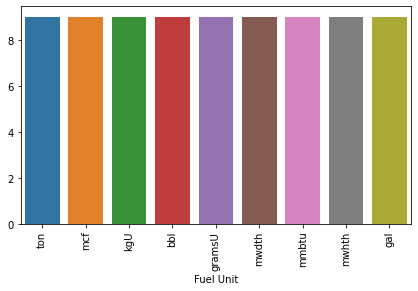

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,4))
plt.xticks(rotation=90)
fuel_unit =fuel_data['fuel_unit']
sns.barplot(data=fuel_data, x=fuel_unit, y=fuel_unit.nunique())
plt.xlabel('Fuel Unit')

#Because of the extreme range of the values for the fuel unit, we can plot the barchart by taking the logarithm of the y-axis as follows:
#g.set_yscale("log")
#g.set_ylim(1, 120000)
#plt.xlabel('Fuel Unit')

In [9]:
fuel_data.groupby('fuel_unit')['record_id'].nunique()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: record_id, dtype: int64

In [10]:
fuel_data.groupby('fuel_unit')['record_id'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: record_id, dtype: int64

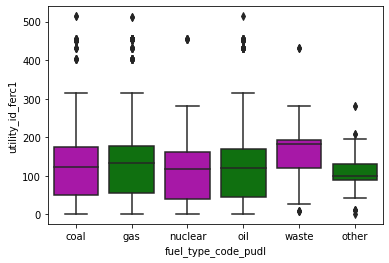

In [12]:
sns.boxplot(x="fuel_type_code_pudl", y="utility_id_ferc1",
            palette=["m", "g"], data=fuel_data)